In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
df = data.drop(columns = 'User ID')

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

[]

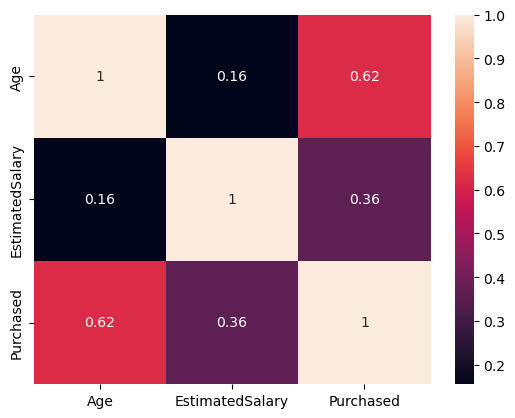

In [8]:
sns.heatmap(data = df.corr() , annot = True)
plt.plot()

[]

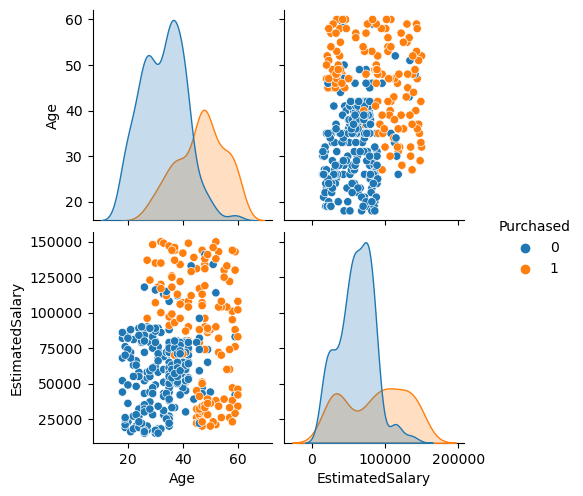

In [9]:
sns.pairplot(data = df,hue = 'Purchased')
plt.plot()

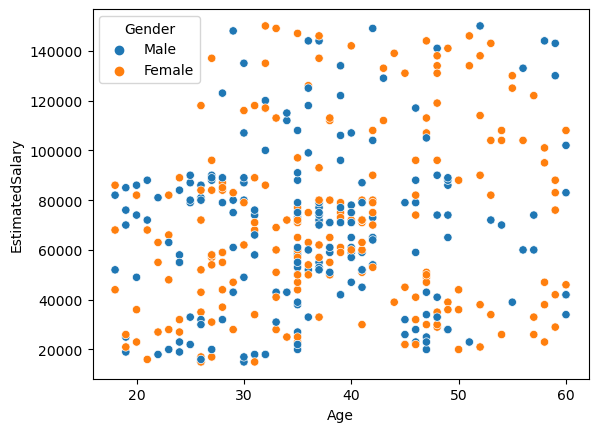

In [10]:
sns.scatterplot(data = df,x = 'Age',y = 'EstimatedSalary' ,hue = 'Gender')
plt.show()

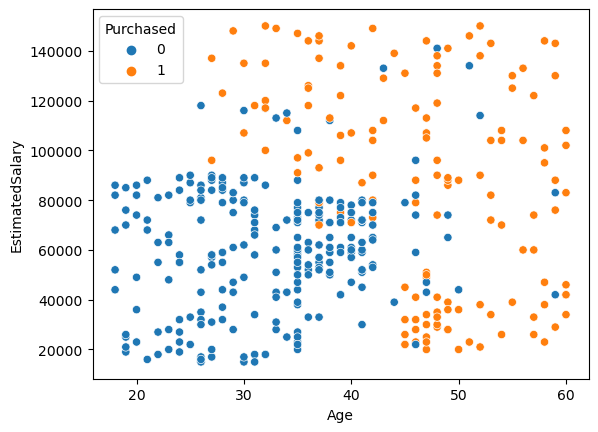

In [11]:
sns.scatterplot(data = df,x = 'Age',y = 'EstimatedSalary' ,hue = 'Purchased')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [15]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [17]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

In [18]:
lr_model = lr.fit(x_train,y_train)
knn_model = knn.fit(x_train,y_train)
svc_model = svc.fit(x_train,y_train)

In [19]:
lr_pred = lr_model.predict(x_test)

In [20]:
knn_pred = knn_model.predict(x_test)
svc_pred = svc_model.predict(x_test)

In [21]:
# accuracy of lr 
lr_accuracy_score = accuracy_score(lr_pred,y_test)
lr_accuracy_score

0.8875

In [22]:
knn_accuracy_score = accuracy_score(knn_pred,y_test)
knn_accuracy_score

0.825

In [23]:
svc_accuracy_score = accuracy_score(svc_pred,y_test)
svc_accuracy_score

0.7375

In [24]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred_decision_tree = dt_classifier.predict(x_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

Accuracy: 0.825


In [26]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Accuracy: 0.9375


In [27]:
rf_classifier = RandomForestClassifier(
    n_estimators=50, 
    max_depth=5, 
    min_samples_split=2, 
    random_state=42
)

rf_classifier.fit(x_train, y_train)
y_pred_random_forest = rf_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))

Accuracy: 0.9125


In [31]:
import numpy as np
new_input = np.array([[1,25,250000]])
nb_classifier.predict(new_input)

c:\Users\altha\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)